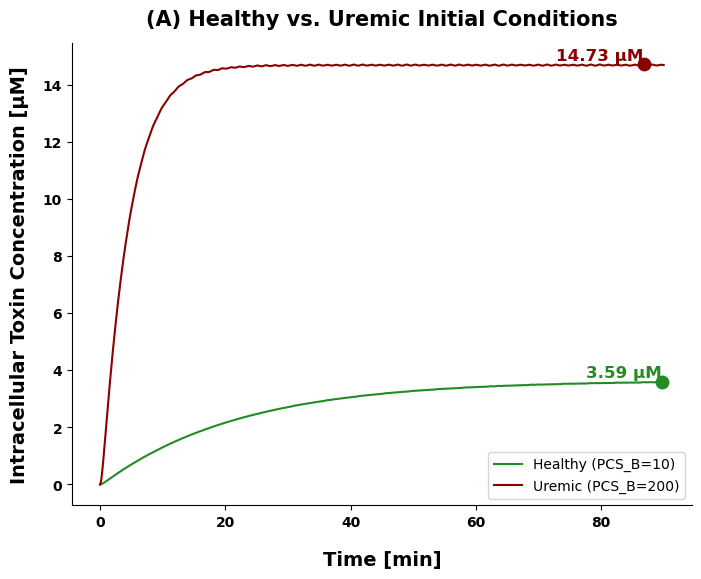

In [4]:
# EXPERIMENTAL MODEL
# Comparing healthy vs. uremic conditions

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Parameters
V_Cell_Monolayer = 3.2e-07
V_Mem = 0.0032
V_Well = 0.0001

initial_OAT1 = 0.190962
initial_PCS_C = 0
initial_PCS_OAT1 = 0
Km_Efflux = 69
Kr_Uptake = 0.000
Kr_dissociation = 0.000
Vmax_Efflux = 0.0003986

# Healthy
Kf_Uptake_Healthy = 1.44e-05
Kf_dissociation_Healthy = 5.78e-04

# Uremic
Kf_Uptake_Uremic = 1.99e-05
Kf_dissociation_Uremic = 4.05e-04

# Function defining the system of ODEs
def model(t, y, params):
    # Unpack state variables
    PCS_B, OAT1, PCS_OAT1, PCS_C = y
    # Unpack parameters
    Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, Vmax_Efflux, Km_Efflux, V_Mem, V_Well, V_Cell_Monolayer = params

    dPCS_Bdt = (-((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) + 
                ((Vmax_Efflux * PCS_C) / (Km_Efflux + PCS_C)) * V_Mem) / V_Well

    dOAT1dt = (-((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) + 
               ((Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Mem

    dPCS_OAT1dt = (((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) - 
                   ((Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Mem

    dPCS_Cdt = ((-(Vmax_Efflux * PCS_C) / (Km_Efflux + PCS_C) * V_Mem) +
                ((Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Cell_Monolayer

    return [dPCS_Bdt, dOAT1dt, dPCS_OAT1dt, dPCS_Cdt]

# Initial conditions
initial_PCS_B_healthy = 10
initial_PCS_B_uremic = 200

y0_healthy = [initial_PCS_B_healthy, initial_OAT1, initial_PCS_OAT1, initial_PCS_C]
y0_uremic = [initial_PCS_B_uremic, initial_OAT1, initial_PCS_OAT1, initial_PCS_C]

# Time span
t_span = (0, 5400)

# Solve for healthy conditions
params_healthy = [Kf_Uptake_Healthy, Kr_Uptake, Kf_dissociation_Healthy, Kr_dissociation, 
                  Vmax_Efflux, Km_Efflux, V_Mem, V_Well, V_Cell_Monolayer]
solution_healthy = solve_ivp(model, t_span, y0_healthy, args=(params_healthy,), t_eval=np.linspace(0, 5400, 10000))

# Solve for uremic conditions
params_uremic = [Kf_Uptake_Uremic, Kr_Uptake, Kf_dissociation_Uremic, Kr_dissociation, 
                 Vmax_Efflux, Km_Efflux, V_Mem, V_Well, V_Cell_Monolayer]
solution_uremic = solve_ivp(model, t_span, y0_uremic, args=(params_uremic,), t_eval=np.linspace(0, 5400, 10000))

# Plotting
colors = {
    'healthy': 'forestgreen',
    'uremic': 'darkred'
}

plt.figure(figsize=(8, 6))
plt.plot(solution_healthy.t / 60, solution_healthy.y[3], label='Healthy (PCS_B=10)', color=colors['healthy'])  # Convert time to minutes
plt.plot(solution_uremic.t / 60, solution_uremic.y[3], label='Uremic (PCS_B=200)', color=colors['uremic'])  # Convert time to minutes

# Find and mark the maximum values
max_healthy_concentration = np.max(solution_healthy.y[3])
max_healthy_time = solution_healthy.t[np.argmax(solution_healthy.y[3])]
max_uremic_concentration = np.max(solution_uremic.y[3])
max_uremic_time = solution_uremic.t[np.argmax(solution_uremic.y[3])]

# Mark the maximum points with scatter and label them
plt.scatter(max_healthy_time / 60, max_healthy_concentration, color=colors['healthy'], s=80, marker='o')  # Convert time to minutes
plt.text(max_healthy_time / 60, max_healthy_concentration + 0.05,  # Add 0.05 to move it slightly above
         f'{max_healthy_concentration:.2f} μM', 
         ha='right', va='bottom', fontsize=12, color=colors['healthy'], fontweight='bold')

plt.scatter(max_uremic_time / 60, max_uremic_concentration, color=colors['uremic'], s=80, marker='o')  # Convert time to minutes
plt.text(max_uremic_time / 60, max_uremic_concentration + 0.05,  # Add 0.05 to move it slightly above
         f'{max_uremic_concentration:.2f} μM', 
         ha='right', va='bottom', fontsize=12, color=colors['uremic'], fontweight='bold')

# Label the axes
plt.xlabel('Time [min]', fontsize=14, labelpad=15, fontweight='bold')  # Updated to minutes
plt.ylabel('Intracellular Toxin Concentration [μM]', fontsize=14, labelpad=10, fontweight='bold')
plt.legend()
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('(A) Healthy vs. Uremic Initial Conditions', fontsize=15, fontweight='bold', pad=13)
plt.savefig('Results_2.1.png', dpi=300)
plt.show()


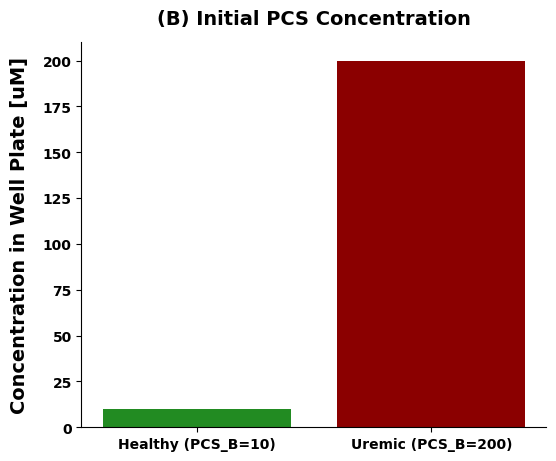

In [5]:
# Values for the bar plot
pcs_b_values = [initial_PCS_B_healthy, initial_PCS_B_uremic]
conditions = ['Healthy (PCS_B=10)', 'Uremic (PCS_B=200)']
colors_bar = [colors['healthy'], colors['uremic']]

# Create bar plot
plt.figure(figsize=(6, 5))
plt.bar(conditions, pcs_b_values, color=colors_bar)
plt.ylabel('Concentration in Well Plate [uM]', fontsize=14, labelpad=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
# Remove the top and right spines to make the plot open
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
plt.title('(B) Initial PCS Concentration', fontsize=14, fontweight='bold', pad=13)
plt.savefig('Results_2.2.png')
plt.show()
